In [12]:
from numpy import pi, sin, cos

# !pip install PrettyTable
from prettytable import PrettyTable

import matplotlib.pyplot as plt

In [13]:
a = 0
b = pi
n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

def f(x):
    return ((sin(x*cos(2*x)))/(x**2 + 5))**2
def divide_evenly(a, b, len):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(len-1)
    return [a+i*step for i in range(len)] 

a: 0
b: 3.141592653589793
N: 50


In [14]:
x_list = divide_evenly(a, b ,n)
y_list = [f(i) for i in x_list]
print(x_list)
print(y_list)

[0.0, 0.0641141357875468, 0.1282282715750936, 0.19234240736264038, 0.2564565431501872, 0.32057067893773394, 0.38468481472528077, 0.4487989505128276, 0.5129130863003744, 0.5770272220879211, 0.6411413578754679, 0.7052554936630148, 0.7693696294505615, 0.8334837652381083, 0.8975979010256552, 0.9617120368132019, 1.0258261726007487, 1.0899403083882955, 1.1540544441758422, 1.218168579963389, 1.2822827157509358, 1.3463968515384828, 1.4105109873260295, 1.4746251231135763, 1.538739258901123, 1.6028533946886698, 1.6669675304762166, 1.7310816662637634, 1.7951958020513104, 1.8593099378388571, 1.9234240736264039, 1.9875382094139507, 2.0516523452014974, 2.1157664809890444, 2.179880616776591, 2.243994752564138, 2.3081088883516845, 2.3722230241392315, 2.436337159926778, 2.500451295714325, 2.5645654315018716, 2.6286795672894185, 2.6927937030769655, 2.756907838864512, 2.821021974652059, 2.8851361104396056, 2.9492502462271526, 3.013364382014699, 3.077478517802246, 3.141592653589793]
[0.0, 0.00016125300722

In [15]:
# https://studfiles.net/preview/4030410/
# t=x, y=x, i=j
def lagrange(x, x_values, y_values):
    res = 0 # bc we add
    for i, (x_i, y_i) in enumerate(zip(x_values, y_values)):
        mul = 1 # bc we multiply
        for j, x_j in enumerate(x_values):
            if j != i:
                mul *= (x - x_j) / (x_i - x_j)
            else:
                continue
        res += y_i * mul
    return res

l = [lagrange(i, x_list, y_list) for i in x_list]
print(l)

[0.0, 0.000161253007220479, 0.0006082265534836332, 0.0012396014756690444, 0.0019135957690836717, 0.0024795555239464475, 0.0028088236284529444, 0.0028193799684888103, 0.002492679340703877, 0.0018836015215234648, 0.0011240055545493474, 0.0004174562191217423, 1.944274012593377e-05, 0.00019709546270193267, 0.0011679278090631013, 0.0030287049732199683, 0.005698486188033032, 0.00890510894979209, 0.012233651759449309, 0.015229349924145773, 0.017519104348727072, 0.018903608965308082, 0.019385862589084896, 0.019133222049969534, 0.018399039971945513, 0.017440047818738428, 0.016455697937981444, 0.015556973546467318, 0.014757878770450974, 0.013979631023861745, 0.013064621122358198, 0.011808775039223543, 0.010028095528531556, 0.007666200122944655, 0.004915705116764333, 0.002276702902350567, 0.0004530660926728818, 5.1087576468978836e-05, 0.0012018340332114019, 0.003367091696773068, 0.005536760992317616, 0.006748906481341763, 0.006585050520899917, 0.005299264759284447, 0.003542356975029782, 0.0019429

In [16]:
m = int(input('M'))
print(f'm: {m}')

m: 100


In [17]:
xm_list = divide_evenly(a, b, m)
ym_list = [f(i) for i in xm_list]
lm = [lagrange(i, x_list, y_list) for i in xm_list]
print(xm_list)
print(ym_list)
print(lm)

[0.0, 0.03173325912716963, 0.06346651825433926, 0.0951997773815089, 0.12693303650867852, 0.15866629563584814, 0.1903995547630178, 0.2221328138901874, 0.25386607301735703, 0.28559933214452665, 0.3173325912716963, 0.3490658503988659, 0.3807991095260356, 0.4125323686532052, 0.4442656277803748, 0.47599888690754444, 0.5077321460347141, 0.5394654051618837, 0.5711986642890533, 0.6029319234162229, 0.6346651825433925, 0.6663984416705622, 0.6981317007977318, 0.7298649599249014, 0.7615982190520711, 0.7933314781792408, 0.8250647373064104, 0.85679799643358, 0.8885312555607496, 0.9202645146879193, 0.9519977738150889, 0.9837310329422585, 1.0154642920694281, 1.0471975511965979, 1.0789308103237674, 1.110664069450937, 1.1423973285781066, 1.1741305877052763, 1.2058638468324459, 1.2375971059596156, 1.269330365086785, 1.3010636242139548, 1.3327968833411243, 1.364530142468294, 1.3962634015954636, 1.4279966607226333, 1.4597299198498028, 1.4914631789769726, 1.5231964381041423, 1.5549296972313118, 1.5866629563

In [20]:
table = PrettyTable()

table.field_names = ["x", "f(x)", "L(x)"]

for i, (xm_i, ym_i, lm_i) in enumerate(zip(xm_list, ym_list, lm)):
    table.add_row([xm_i, ym_i, lm_i])
print(table)

+---------------------+------------------------+------------------------+
|          x          |          f(x)          |          L(x)          |
+---------------------+------------------------+------------------------+
|         0.0         |          0.0           |          0.0           |
| 0.03173325912716963 | 4.008839984165443e-05  | 0.0025893592662833372  |
| 0.06346651825433926 | 0.00015807377307932777 | 0.00017147852914258213 |
|  0.0951997773815089 | 0.00034725891363146305 | 0.0002648422949175525  |
| 0.12693303650867852 |  0.000596943382186105  | 0.0005957864810048477  |
| 0.15866629563584814 | 0.0008930733074973084  |  0.000897544905075599  |
|  0.1903995547630178 | 0.0012190721373430934  | 0.0012191863429491699  |
|  0.2221328138901874 | 0.0015567865630991772  | 0.0015564419086425705  |
| 0.25386607301735703 | 0.0018874792405332687  | 0.0018874656992649134  |
| 0.28559933214452665 | 0.0021928054332690777  |  0.002192840148559444  |
|  0.3173325912716963 | 0.002455722684

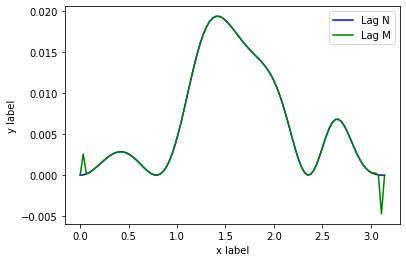

In [21]:
# plt.plot(x_list, y_list, color='b', label='N')
# plt.plot(xm_list, ym_list, color='r', label='M')
plt.plot(xm_list, ym_list, color='b', label='M')
plt.plot(xm_list, lm, color='g', label='Lag M')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend(loc='best')
